In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare the Data

In [2]:
# Read the data
ratings_df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m18/lesson_3/datasets/ratings.txt",
                         sep=" ",
                         header=None,
                         names=["user_id", "movie_id", "rating"])
ratings_df

,user_id,movie_id,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
...,...,...,...
35492,1508,84,3.5
35493,1508,17,4.0
35494,1508,669,1.0
35495,1508,686,2.5


In [3]:
# Remove duplicates on user_id and movie_id, keeping the last row
ratings_df = ratings_df.drop_duplicates(subset=["user_id", "movie_id"], keep="last")
ratings_df

,user_id,movie_id,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
...,...,...,...
35492,1508,84,3.5
35493,1508,17,4.0
35494,1508,669,1.0
35495,1508,686,2.5


In [4]:
# Pivot the DataFrame and fill the NAs
ratings_matrix = ratings_df.pivot(index="user_id", columns="movie_id", values="rating").fillna(0)
ratings_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071
user_id,,,,,,,,,,,,,,,,,,,,,
1,2.0,4.0,3.5,3.0,4.0,3.5,3.5,3.0,2.5,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,3.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1505,4.0,3.0,2.0,3.0,4.0,0.0,4.0,3.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1506,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Create a variable for normalization
# Ratings are between 0-5
normalization_factor = 5

# Normalize the ratings
normalized_ratings = ratings_matrix / normalization_factor
normalized_ratings

movie_id,1,2,3,4,5,6,7,8,9,10,...,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.4,0.8,0.7,0.6,0.8,0.7,0.7,0.6,0.5,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.6,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,0.6,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6
1505,0.8,0.6,0.4,0.6,0.8,0.0,0.8,0.6,0.8,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1506,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_train = normalized_ratings.values
X_train

array([[0.4, 0.8, 0.7, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.8, 0. , ..., 0. , 0. , 0. ],
       [0.3, 0.6, 0.4, ..., 0. , 0. , 0. ]])

## Train the Model

In [7]:
# Set the number of neurons for the layers
hiddenUnits = 20
visibleUnits =  len(ratings_matrix.columns)

# Set the bias of the visible layer to 0. This should use the number of unique movies.
visible_layer_bias = tf.Variable(tf.zeros([visibleUnits]), tf.float32)

# Set the bias of the hidden layer to 0. This will use hiddenUnits, which is
# the number of features we're going to learn
hidden_layer_bias = tf.Variable(tf.zeros([hiddenUnits]), tf.float32)

# Set the Weights to 0
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)

In [8]:
# this code is not really part of the "training" it can be skipped
v0 = tf.zeros([visibleUnits], tf.float32)
# testing to see if the matrix product works
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [9]:
# Phase 1: Input Processing
# Define a function to return only the generated hidden states
def hidden_layer(v0_state, W, hb):
    # probabilities of the hidden units
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)
    # sample_h_given_X
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob))))
    return h0_state

# Print output of zeros input
h0 = hidden_layer(v0, W, hidden_layer_bias)
print("first 15 hidden states: ", h0[0][0:15])

# Define a function to return the reconstructed output
def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb)
    # sample_v_given_h
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob))))
    return v1_state[0]

# Get the reconstructed output from zeros input
v1 = reconstructed_output(h0, W, visible_layer_bias)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 15 hidden states:  tf.Tensor([1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1.], shape=(15,), dtype=float32)
hidden state shape:  (1, 20)
v0 state shape:   (2071,)
v1 state shape:   (2071,)


In [10]:
# Set the error function, which in this case will be the Mean Absolute Error Function.
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.5055529


Epoch: 1 batch #: 0  of 7 sample #: 199 reconstruction error: 0.014370
Epoch: 1 batch #: 1  of 7 sample #: 199 reconstruction error: 0.005505
Epoch: 1 batch #: 2  of 7 sample #: 199 reconstruction error: 0.006779
Epoch: 1 batch #: 3  of 7 sample #: 199 reconstruction error: 0.009507
Epoch: 1 batch #: 4  of 7 sample #: 199 reconstruction error: 0.009372
Epoch: 1 batch #: 5  of 7 sample #: 199 reconstruction error: 0.009073
Epoch: 1 batch #: 6  of 7 sample #: 199 reconstruction error: 0.001202
Epoch: 1 batch #: 7  of 7 sample #: 107 reconstruction error: 0.009923


2024-06-18 19:08:32.267243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 2 batch #: 0  of 7 sample #: 199 reconstruction error: 0.015915
Epoch: 2 batch #: 1  of 7 sample #: 199 reconstruction error: 0.001931
Epoch: 2 batch #: 2  of 7 sample #: 199 reconstruction error: 0.004462
Epoch: 2 batch #: 3  of 7 sample #: 199 reconstruction error: 0.009701
Epoch: 2 batch #: 4  of 7 sample #: 199 reconstruction error: 0.008117
Epoch: 2 batch #: 5  of 7 sample #: 199 reconstruction error: 0.007238
Epoch: 2 batch #: 6  of 7 sample #: 199 reconstruction error: 0.000237
Epoch: 2 batch #: 7  of 7 sample #: 107 reconstruction error: 0.008281


2024-06-18 19:08:33.490395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 3 batch #: 0  of 7 sample #: 199 reconstruction error: 0.014949
Epoch: 3 batch #: 1  of 7 sample #: 199 reconstruction error: 0.001931
Epoch: 3 batch #: 2  of 7 sample #: 199 reconstruction error: 0.003399
Epoch: 3 batch #: 3  of 7 sample #: 199 reconstruction error: 0.007673
Epoch: 3 batch #: 4  of 7 sample #: 199 reconstruction error: 0.009179
Epoch: 3 batch #: 5  of 7 sample #: 199 reconstruction error: 0.008493
Epoch: 3 batch #: 6  of 7 sample #: 199 reconstruction error: 0.000237
Epoch: 3 batch #: 7  of 7 sample #: 107 reconstruction error: 0.006929


2024-06-18 19:08:34.777105: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 4 batch #: 0  of 7 sample #: 199 reconstruction error: 0.015336
Epoch: 4 batch #: 1  of 7 sample #: 199 reconstruction error: 0.000483
Epoch: 4 batch #: 2  of 7 sample #: 199 reconstruction error: 0.005331
Epoch: 4 batch #: 3  of 7 sample #: 199 reconstruction error: 0.008542
Epoch: 4 batch #: 4  of 7 sample #: 199 reconstruction error: 0.009565
Epoch: 4 batch #: 5  of 7 sample #: 199 reconstruction error: 0.013515
Epoch: 4 batch #: 6  of 7 sample #: 199 reconstruction error: 0.000237
Epoch: 4 batch #: 7  of 7 sample #: 107 reconstruction error: 0.008184


2024-06-18 19:08:35.999999: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 5 batch #: 0  of 7 sample #: 199 reconstruction error: 0.017943
Epoch: 5 batch #: 1  of 7 sample #: 199 reconstruction error: 0.000966
Epoch: 5 batch #: 2  of 7 sample #: 199 reconstruction error: 0.004655
Epoch: 5 batch #: 3  of 7 sample #: 199 reconstruction error: 0.008252
Epoch: 5 batch #: 4  of 7 sample #: 199 reconstruction error: 0.006861
Epoch: 5 batch #: 5  of 7 sample #: 199 reconstruction error: 0.008783
Epoch: 5 batch #: 6  of 7 sample #: 199 reconstruction error: 0.000237
Epoch: 5 batch #: 7  of 7 sample #: 107 reconstruction error: 0.009247


2024-06-18 19:08:37.178648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


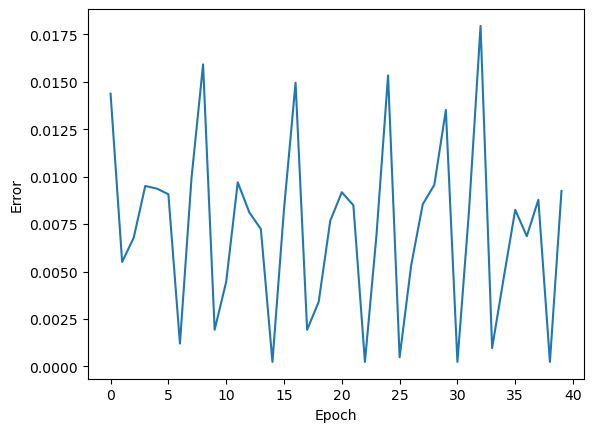

In [11]:
# Set the training variables
epochs = 5
batchsize = 200
errors = []
weights = []
K=1
alpha = 0.1

# Create dataset batches
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(X_train))).batch(batchsize)



v0_state=v0

# Train the model
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:

        for i_sample in range(len(batch_x)):
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hidden_layer_bias)
                v1_state = reconstructed_output(h0_state, W, visible_layer_bias)
                h1_state = hidden_layer(v1_state, W, hidden_layer_bias)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)

                # Update weights
                W = W + alpha * delta_W

                # Update biases
                visible_layer_bias = visible_layer_bias + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hidden_layer_bias = hidden_layer_bias + alpha * tf.reduce_mean(h0_state - h1_state, 0)

                v0_state = v1_state

            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1),
                       "batch #: %i " % batch_number, "of %i" % (len(X_train)/batchsize),
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1

# Plot the errors
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch') #batch number?
plt.show()

## Save Model

In [12]:
# Collect the weights and biases so I can rebuild the model without re-training it
print("Weights: ", W)
print("Hidden Layer Biases: ", hidden_layer_bias)
print("Visible Layer Biases: ", visible_layer_bias)

Weights:  tf.Tensor(
[[-0.70000577 -0.86999637 -0.26999754 ...  0.22000618 -0.54999936
   0.31000665]
 [-0.73000336 -0.37999797 -0.29999548 ...  0.6400045   0.1699913
   1.2799985 ]
 [-0.5800083  -1.2799982   0.01000486 ... -0.07999493 -0.26999637
  -0.24999557]
 ...
 [-0.34999993 -0.5        -0.44999993 ... -0.54999995 -0.44999993
  -0.54999995]
 [-0.09999999 -0.5        -0.29999998 ... -0.29999998 -0.4
  -0.29999998]
 [-0.48       -0.48       -0.32       ... -0.5        -0.29999998
  -0.6000001 ]], shape=(2071, 20), dtype=float32)
Hidden Layer Biases:  tf.Tensor(
[13.500015   -0.9999999   3.6999989   2.0000005  11.100006    2.7999997
  1.9000005   2.6         8.599997   -0.19999987 11.100006    7.2999954
  1.9000005   1.0000002  -0.7999999  -0.39999986 15.4000225   9.800001
  6.799996   11.600008  ], shape=(20,), dtype=float32)
Visible Layer Biases:  tf.Tensor([-2.3950818 -2.3950818 -2.3950818 ... -2.3950818 -2.3950818 -2.3950818], shape=(2071,), dtype=float32)


In [13]:
# Convert the weights into a Pandas DataFrame
weight_settings = pd.DataFrame(data=W.numpy())

# Save weights to CSV
weight_settings.to_csv("rbm_weights.csv", index=False)

In [14]:
# Convert the biases to Pandas DataFrame and export to CSVs
hidden_bias_settings = pd.DataFrame(data=hidden_layer_bias.numpy())
hidden_bias_settings.to_csv("hidden_layer_bias.csv", index=False)
visible_bias_settings = pd.DataFrame(visible_layer_bias.numpy())
visible_bias_settings.to_csv("visible_layer_bias.csv", index=False)

## Retrieve Model

In [15]:
# Read weights and convert back to Tensor
weight_settings = pd.read_csv("rbm_weights.csv")
weights_tensor = tf.constant(weight_settings.values, tf.float32)
weights_tensor

<tf.Tensor: shape=(2071, 20), dtype=float32, numpy=
array([[-0.70000577, -0.86999637, -0.26999754, ...,  0.22000618,
        -0.54999936,  0.31000665],
       [-0.73000336, -0.37999797, -0.29999548, ...,  0.6400045 ,
         0.1699913 ,  1.2799985 ],
       [-0.5800083 , -1.2799982 ,  0.01000486, ..., -0.07999493,
        -0.26999637, -0.24999557],
       ...,
       [-0.34999993, -0.5       , -0.44999993, ..., -0.54999995,
        -0.44999993, -0.54999995],
       [-0.09999999, -0.5       , -0.29999998, ..., -0.29999998,
        -0.4       , -0.29999998],
       [-0.48      , -0.48      , -0.32      , ..., -0.5       ,
        -0.29999998, -0.6000001 ]], dtype=float32)>

In [16]:
# Read the hidden layer biases and then convert back to Tensor
hidden_bias_settings = pd.read_csv("hidden_layer_bias.csv")
hidden_tensor = tf.constant(hidden_bias_settings.values, tf.float32)
hidden_tensor

<tf.Tensor: shape=(20, 1), dtype=float32, numpy=
array([[13.500015  ],
       [-0.9999999 ],
       [ 3.6999989 ],
       [ 2.0000005 ],
       [11.100006  ],
       [ 2.7999997 ],
       [ 1.9000005 ],
       [ 2.6       ],
       [ 8.599997  ],
       [-0.19999987],
       [11.100006  ],
       [ 7.2999954 ],
       [ 1.9000005 ],
       [ 1.0000002 ],
       [-0.7999999 ],
       [-0.39999986],
       [15.4000225 ],
       [ 9.800001  ],
       [ 6.799996  ],
       [11.600008  ]], dtype=float32)>

In [17]:
# Read the visible layer biases and convert back to Tensor
visible_bias_settings = pd.read_csv("visible_layer_bias.csv")
visible_tensor = tf.constant(visible_bias_settings.values, tf.float32)
visible_tensor

<tf.Tensor: shape=(2071, 1), dtype=float32, numpy=
array([[-2.3950818],
       [-2.3950818],
       [-2.3950818],
       ...,
       [-2.3950818],
       [-2.3950818],
       [-2.3950818]], dtype=float32)>

## Test Model Recommendations

In [18]:
# Create a function to reconstruct ratings data
def get_user_recommendations(user_id):
    inputUser = tf.convert_to_tensor(normalized_ratings.loc[user_id].values,"float32")
    v0 = inputUser

    hh0 = tf.nn.sigmoid(tf.matmul([v0], weights_tensor) + hidden_tensor)

    vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(weights_tensor)) + tf.transpose(visible_tensor))

    rec = vv1
    return rec

In [19]:
# Test it (recommendation)
test_user = 1024

recommendation = get_user_recommendations(test_user)
recommendation

<tf.Tensor: shape=(20, 2071), dtype=float32, numpy=
array([[1.42900139e-01, 2.59187311e-01, 2.46351343e-02, ...,
        3.25783840e-05, 1.32899295e-04, 8.15073581e-05],
       [5.81857085e-01, 6.83841407e-01, 4.56700772e-01, ...,
        1.86045794e-03, 4.87824343e-03, 2.29307823e-03],
       [4.12166417e-01, 6.38564348e-01, 2.48224661e-01, ...,
        3.88319982e-04, 1.11125526e-03, 5.27997036e-04],
       ...,
       [1.54535517e-01, 2.93501109e-01, 2.49886680e-02, ...,
        4.29937863e-05, 1.71371415e-04, 1.04315244e-04],
       [1.90315351e-01, 3.55652928e-01, 4.81620133e-02, ...,
        9.01081221e-05, 3.26411828e-04, 1.78844042e-04],
       [1.51922360e-01, 2.84695655e-01, 2.39858143e-02, ...,
        3.80513266e-05, 1.53195026e-04, 9.42905463e-05]], dtype=float32)>

In [20]:
# Convert recommendation to DataFrame

rec_df = pd.DataFrame({"movie_id": ratings_matrix.columns, "user_id": test_user})
rec_df = rec_df.assign(RecommendationScore = recommendation[0])

# Sort recommendations
rec_df.sort_values(["RecommendationScore"], ascending=False).head(20)

,movie_id,user_id,RecommendationScore
9,10,1024,0.792538
12,13,1024,0.761455
213,214,1024,0.755711
211,212,1024,0.673608
248,249,1024,0.578927
247,248,1024,0.571260
251,252,1024,0.545451
253,254,1024,0.524944
214,215,1024,0.507224
216,217,1024,0.419677


In [21]:
# Merge the recommendation scores with original dataset ratings
merged_df = rec_df.merge(ratings_df, on=['movie_id', 'user_id'], how='outer')
merged_df.sort_values(["RecommendationScore"], ascending=False).head(20)

,movie_id,user_id,RecommendationScore,rating
9,10,1024,0.792538,2.5
12,13,1024,0.761455,3.5
213,214,1024,0.755711,3.5
211,212,1024,0.673608,0.5
248,249,1024,0.578927,4.0
247,248,1024,0.571260,2.5
251,252,1024,0.545451,NaN
253,254,1024,0.524944,4.0
214,215,1024,0.507224,4.0
216,217,1024,0.419677,NaN
